# Importing Required Libraries

In [1]:
import pandas as pd
from textblob import TextBlob

# Loading Dataset

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Preprocessing and cleaning Text Data

In [3]:
# Function to clean and preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)

df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


# Classifying Sentiments

In [5]:
# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['cleaned_review'].apply(analyze_sentiment)
df.head()

# Summary
sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100
sentiment_distribution

sentiment
positive    75.680
negative    24.264
neutral      0.056
Name: proportion, dtype: float64

# Visualizing Sentiment Distribution

sentiment
positive    75.680
negative    24.264
neutral      0.056
Name: proportion, dtype: float64


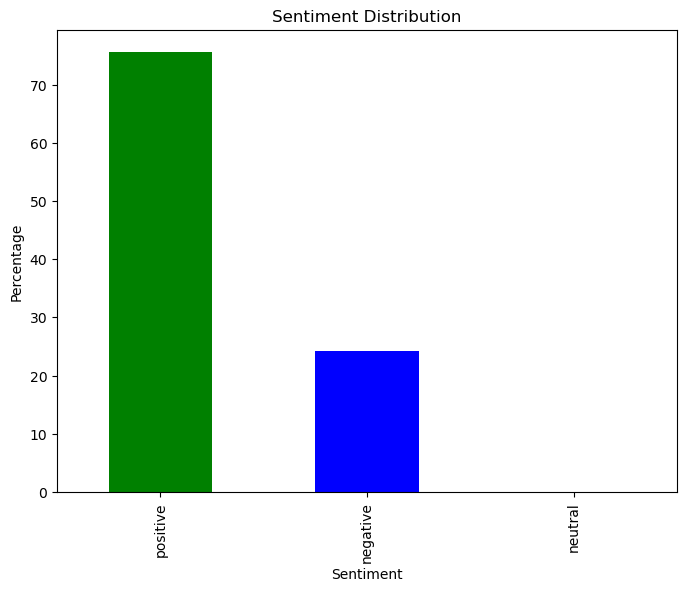

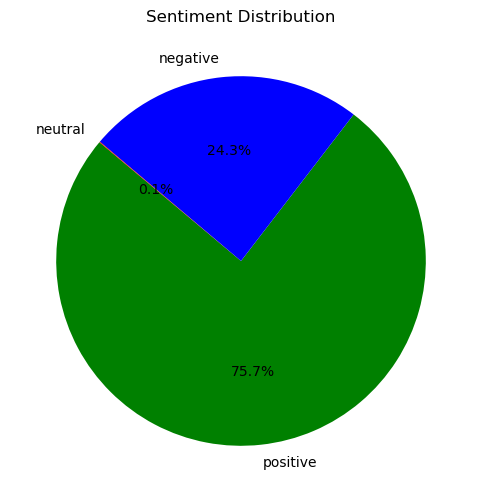

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_distribution)

# Bar plot for sentiment distribution using matplotlib
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

# Pie chart for sentiment distribution using seaborn
plt.figure(figsize=(8, 6))
sns.set_palette(['green', 'blue', 'red'])
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()